In [3]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rcParams
from matplotlib import rc
from netCDF4 import Dataset
import pandas as pd

from scipy.stats import gaussian_kde
%matplotlib inline

In [4]:
rcParams['savefig.dpi'] = 300
rcParams['figure.dpi'] = 300

In [5]:
par_short = 'dwps'
period = 1
par_name = 'swell_w_p'+str(period)
direction = False

# Loading Hs data
data = Dataset(r'ERA5/'+par_name+'.nc', mode='r')
print(data)
lon = data.variables['longitude'][:]
lat = data.variables['latitude'][:]
time = data.variables['time'][:]
if (period == 1):
    par = data.variables[par_short][:][:,0,0,0]
else:
    par = data.variables[par_short][:][:,0,0]

# print('t0 =',time[0],'= 01/01/2009')
print(par[0])

# writing csv
if (period == 1):
    pd_time = pd.date_range(start='2009-01-01', end='2020-12-31', freq='h')
if (period == 2):
    pd_time = pd.date_range(start='1997-01-01', end='2009-01-01', freq='h')
if (period == 3):
    pd_time = pd.date_range(start='1985-01-01', end='1997-01-01', freq='h')
if (period == 4):
    pd_time = pd.date_range(start='1979-01-01', end='1985-01-01', freq='h')
A = np.zeros([len(time),3])
A[:,0] = time
A[:,1] = pd_time[:len(time)]
A[:,2] = par
A = A[A[:,-1]>-100]

if(direction == True):
#     A[:,2][np.isclose(A[:,2],35.31, 9e-3)] = np.nan # deleting weird error
    A[:,2] = -(A[:,2]/360*2*np.pi-np.pi)

np.savetxt('ERA5/'+par_name+'.csv',A,delimiter=',')
print(lat, lon)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2020-08-04 15:08:46 GMT by grib_to_netcdf-2.16.0: /opt/ecmwf/eccodes/bin/grib_to_netcdf -S param -o /cache/data9/adaptor.mars.internal-1596545633.1420999-12088-28-c2ea36ea-c736-4959-91b2-223e919cbcc4.nc /cache/tmp/c2ea36ea-c736-4959-91b2-223e919cbcc4-adaptor.mars.internal-1596545633.1427262-12088-6-tmp.grib
    dimensions(sizes): longitude(1), latitude(1), expver(2), time(101494)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 expver(expver), int32 time(time), int16 dwps(time,expver,latitude,longitude)
    groups: 
0.4303220990936263
[50.74] [0.24]


0.26960090994834895

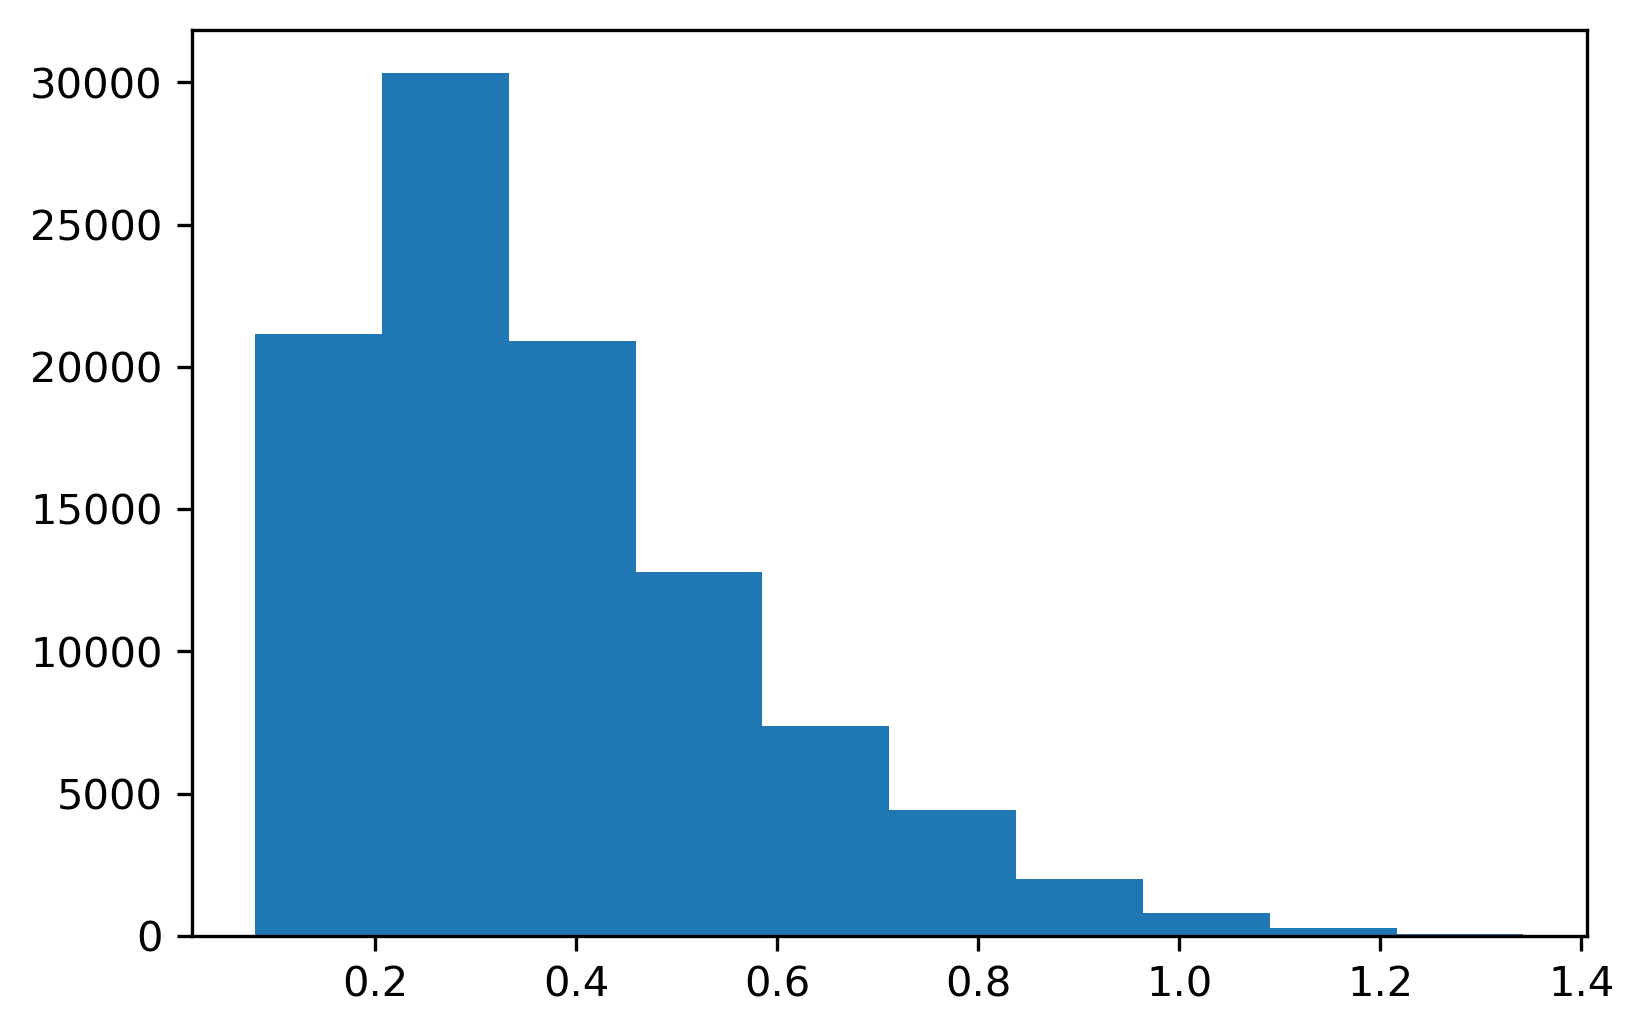

In [34]:
plot = plt.hist(A[:,-1],10)
(plot[1][np.argmax(plot[0])] + plot[1][np.argmax(plot[0])+1])/2

array([], dtype=float64)

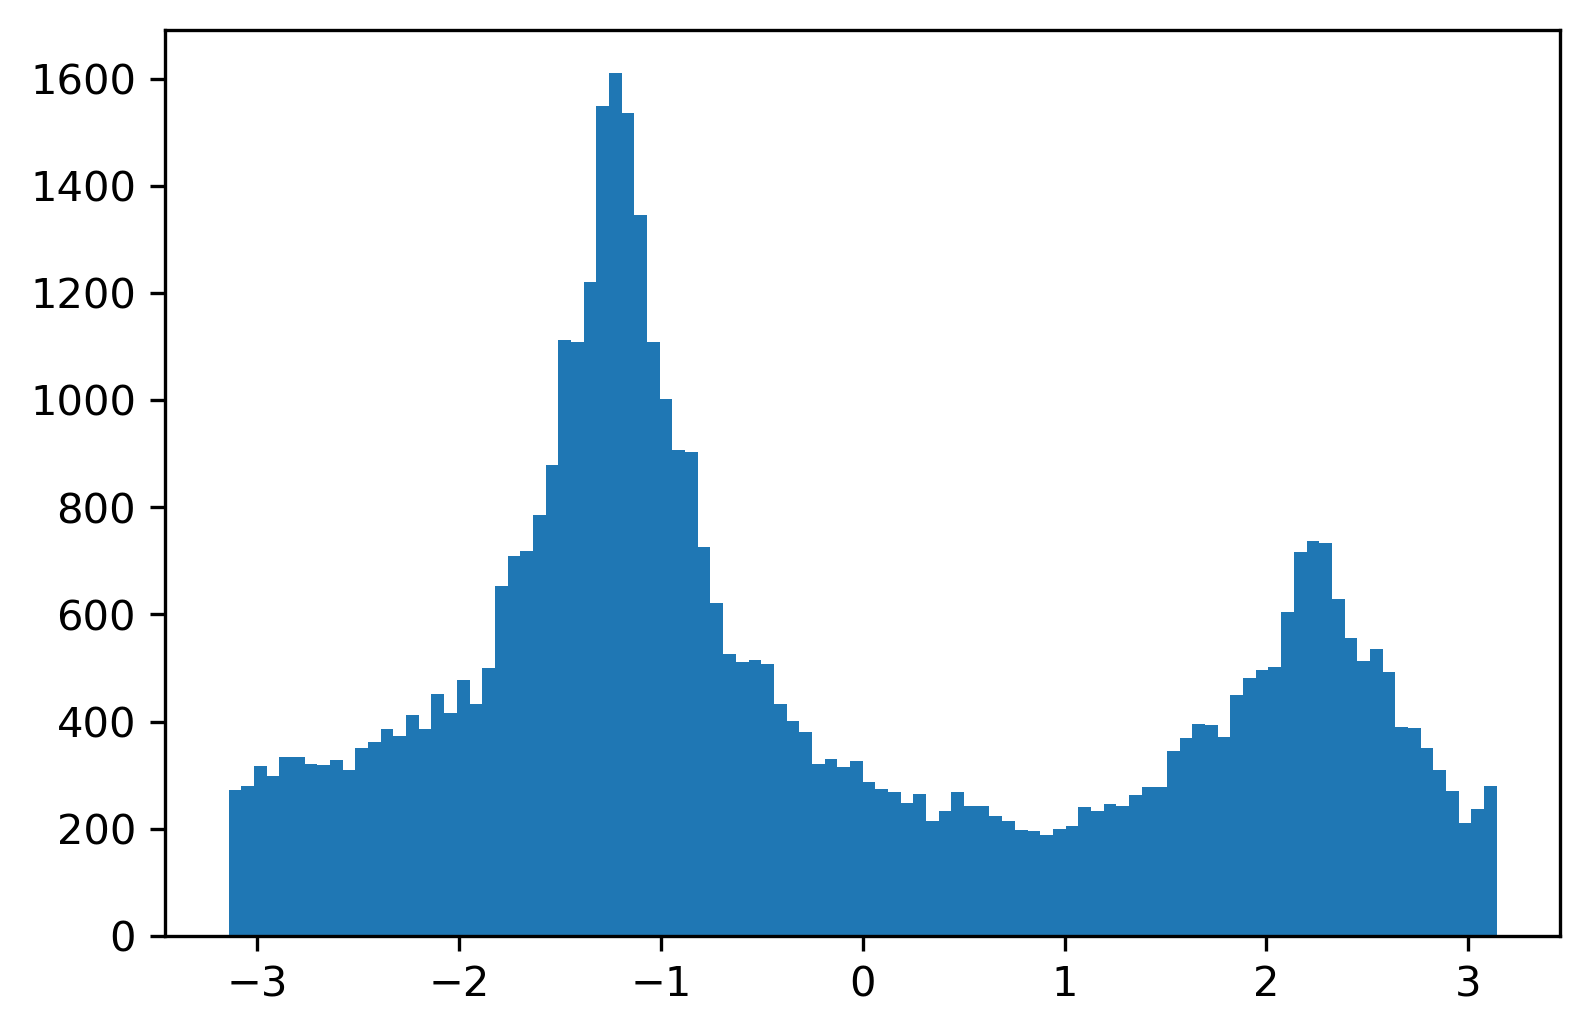

In [204]:
# # plt.figure(figsize=[100,30])
# # plt.plot(A[:,2],'.')
plt.figure()
plt.hist(A[:,2],100)

A[:,2][np.isclose(A[:,2],35.31, 2e-4)]

## Loading data

In [127]:
# Loading Hs data
data = Dataset(r'ERA5 wave data/Hs_ww_p4.nc', mode='r')
lon = data.variables['longitude'][:]
lat = data.variables['latitude'][:]
time = data.variables['time'][:]
Hs_ww = data.variables['shww'][:][:,0,0]

print('t0 =',time[0],'= 01/01/2009')
Hs_ww

t0 = 692496 = 01/01/2009


masked_array(data=[1.68798951, 1.69036888, 1.72243365, ..., 1.12079422,
                   1.22525967, 1.30332551],
             mask=False,
       fill_value=1e+20)

In [90]:
# Loading T data
data = Dataset(r'ERA5 wave data/T_m_p4.nc', mode='r') # Change the name to ww
lon = data.variables['longitude'][:]
lat = data.variables['latitude'][:]
time = data.variables['time'][:]
Tww_T = data.variables['mpww'][:]

In [94]:
# Loading SWELL T data
data = Dataset(r'ERA5 wave data/T_s_m.nc', mode='r') # Change the name to ww
lon = data.variables['longitude'][:]
lat = data.variables['latitude'][:]
time = data.variables['time'][:]
T_s_m = data.variables['mpts'][:][:,0,0,0]

In [101]:
# Loading SWELL Hs data
data = Dataset(r'ERA5 wave data/Hs_s_m.nc', mode='r') # Change the name to ww
lon = data.variables['longitude'][:]
lat = data.variables['latitude'][:]
time = data.variables['time'][:]
Hs_s_m = data.variables['shts'][:][:,0,0,0]

In [25]:
### Loading u10 & v10 data
data = Dataset(r'ERA5 wave data/u10_p4.nc', mode='r') # Change the name to ww
data2 = Dataset(r'ERA5 wave data/v10_p4.nc', mode='r') # Change the name to ww
lon = data.variables['longitude'][:]
lat = data.variables['latitude'][:]
time = data.variables['time'][:]
u10 = data.variables['u10'][:][:,0,0]
v10 = data2.variables['v10'][:][:,0,0]

In [105]:
# Loading wave direction data
data = Dataset(r'ERA5 wave data/direc_m.nc', mode='r') # Change the name to ww
lon = data.variables['longitude'][:]
lat = data.variables['latitude'][:]
time = data.variables['time'][:]
dww_m = data.variables['mdww'][:][:,0,0,0]

### Saving to CSV's

In [52]:
# Tww_m
# pd_time = pd.date_range(start='1997-01-01', end='2009-01-01', freq='h')

# pd_time = pd.date_range(start='1979-01-01', end='1985-01-01', freq='h')

A = np.zeros([len(time),3])
A[:,0] = time
A[:,1] = pd_time[:len(time)]
# A[:,2] = T_m
A = A[A[:,-1]>-100]

np.savetxt('ERA5 wave data/Tww_m_p4.csv',A,delimiter=',')

In [98]:
# T_s_m
pd_time = pd.date_range(start='1997-01-01', end='2009-01-01', freq='h')
# pd_time = pd.date_range(start='1979-01-01', end='1985-01-01', freq='h')

A = np.zeros([len(time),3])
A[:,0] = time
A[:,1] = pd_time[:len(time)]
A[:,2] = T_s_m
A = A[A[:,-1]>-100]

np.savetxt('ERA5 wave data/T_s_m.csv',A,delimiter=',')

In [103]:
# Hs_s_m
pd_time = pd.date_range(start='2009-01-01', end='2020-12-31', freq='h')

A = np.zeros([len(time),3])
A[:,0] = time
A[:,1] = pd_time[:len(time)]
A[:,2] = Hs_s_m
A = A[A[:,-1]>-100]

np.savetxt('ERA5 wave data/Hs_s_m.csv',A,delimiter=',')

In [107]:
# Wave direction
pd_time = pd.date_range(start='2009-01-01', end='2020-12-31', freq='h')

A = np.zeros([len(time),3])
A[:,0] = time
A[:,1] = pd_time[:len(time)]
A[:,2] = -(dww_m/360*2*np.pi-np.pi)
A = A[A[:,-1]>-100]

np.savetxt('ERA5 wave data/dww_m.csv',A,delimiter=',')

In [26]:
# u10 & v10

period = 4
if (period == 1):
    pd_time = pd.date_range(start='2009-01-01', end='2020-12-31', freq='h')
if (period == 2):
    pd_time = pd.date_range(start='1997-01-01', end='2009-01-01', freq='h')
if (period == 3):
    pd_time = pd.date_range(start='1985-01-01', end='1997-01-01', freq='h')
if (period == 4):
    pd_time = pd.date_range(start='1979-01-01', end='1985-01-01', freq='h')



A = np.zeros([len(time),3])
A[:,0] = time
A[:,1] = pd_time[:len(time)]
A[:,2] = u10
A = A[A[:,-1]>-100]

np.savetxt('ERA5 wave data/u10_'+str(period)+'.csv',A,delimiter=',')

A = np.zeros([len(time),3])
A[:,0] = time
A[:,1] = pd_time[:len(time)]
A[:,2] = v10
A = A[A[:,-1]>-100]

np.savetxt('ERA5 wave data/v10_'+str(period)+'.csv',A,delimiter=',')

A = np.zeros([len(time),3])
A[:,0] = time
A[:,1] = pd_time[:len(time)]
A[:,2] = (v10**2+u10**2)**0.5
A = A[A[:,-1]>-100]

np.savetxt('ERA5 wave data/mod10_'+str(period)+'.csv',A,delimiter=',')

############################# Wind angle ###############################

angle = np.zeros(len(u10))
for i in range(len(u10)):
    if (u10[i] > 0):
        angle[i] = -np.pi/2 + np.arctan(v10[i]/u10[i])
    else:
        angle[i] =  np.pi/2 + np.arctan(v10[i]/u10[i])

A = np.zeros([len(time),3])
A[:,0] = time
A[:,1] = pd_time[:len(time)]
A[:,2] = angle
A = A[A[:,-1]>-100]

np.savetxt('ERA5 wave data/mod10_angle_'+str(period)+'.csv',A,delimiter=',')

### Loading CSV's

In [ ]:
# Slow cell
P_CSV = pd.read_csv('ERA5 Precipitation/Precipitation_1loc.csv',header=None,parse_dates=[1])
P_CSV.iloc[:,1] = pd.to_datetime(np.asarray(P_CSV.iloc[:,1],float))

In [55]:
Hs_ww_CSV = pd.read_csv('ERA5 wave data/Hs_ww.csv',header=None,parse_dates=[1])
Hs_ww_CSV.iloc[:,1] = pd.to_datetime(np.asarray(Hs_ww_CSV.iloc[:,1],float))

T_ww_m_CSV = pd.read_csv('ERA5 wave data/Tww_m.csv',header=None,parse_dates=[1])
T_ww_m_CSV.iloc[:,1] = pd.to_datetime(np.asarray(T_ww_m_CSV.iloc[:,1],float))

u10_CSV = pd.read_csv('ERA5 wave data/u10.csv',header=None,parse_dates=[1])
u10_CSV.iloc[:,1] = pd.to_datetime(np.asarray(u10_CSV.iloc[:,1],float))

v10_CSV = pd.read_csv('ERA5 wave data/v10.csv',header=None,parse_dates=[1])
v10_CSV.iloc[:,1] = pd.to_datetime(np.asarray(u10_CSV.iloc[:,1],float))

In [603]:
Buoy_CSV = pd.read_csv('Wave data - Pevensey Bay (no spec)\data\waves\PBy_waves_all_years.csv',delimiter='\t',parse_dates=[0],index_col=0)
Buoy_CSV[Buoy_CSV == 9999] = np.nan
Buoy_CSV = Buoy_CSV.loc['2009-01-01':]
Buoy_CSV = Buoy_CSV[Buoy_CSV.iloc[:,2] == 0]

KeyboardInterrupt: 

In [98]:
u500_CSV = pd.read_csv('ERA5/u500.csv',header=None,parse_dates=[1])
# u500_CSV.iloc[:,1] = pd.to_datetime(np.asarray(u500_CSV.iloc[:,1],float))

v500_CSV = pd.read_csv('ERA5/v500.csv',header=None,parse_dates=[1])
# v500_CSV.iloc[:,1] = pd.to_datetime(np.asarray(u500_CSV.iloc[:,1],float))

### Simple data compulations & Functions

In [99]:
angle = np.zeros(len(u500_CSV))
for i in range(len(u500_CSV)):
    if (u500_CSV.iloc[i,2] > 0):
        angle[i] = -np.pi/2 + np.arctan(v500_CSV.iloc[i,2]/u500_CSV.iloc[i,2])
    else:
        angle[i] = np.pi/2 + np.arctan(v500_CSV.iloc[i,2]/u500_CSV.iloc[i,2])
        
mod500 = (u500_CSV.iloc[:,2]**2+v500_CSV.iloc[:,2]**2)**0.5

In [100]:
mod500_csv = np.asarray(u500_CSV)
mod500_csv[:,2] = mod500

angle500 = np.asarray(u500_CSV)
angle500[:,2] = angle
mod500_csv

array([[692496.0, '2.839968000000000000e+17', 19.760906165490894],
       [692497.0, '2.840004000000000000e+17', 19.719698404405975],
       [692498.0, '2.840040000000000000e+17', 19.807660280819885],
       ...,
       [1054077.0, '1.585688400000000000e+18', 9.133077088693897],
       [1054078.0, '1.585692000000000000e+18', 9.249993683832662],
       [1054079.0, '1.585695600000000000e+18', 9.355705505238145]],
      dtype=object)

In [101]:
np.savetxt('ERA5/mod500.csv',mod500_csv,delimiter=',', fmt='%s')
np.savetxt('ERA5/mod500_angle.csv',angle500,delimiter=',', fmt='%s')

In [58]:
# Density scatter fun
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

def density_scatter( x , y, title, xlabel, ylabel, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots()
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    # Sort the points by density, so that the densest points are plotted last
    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]

    ax.scatter( x, y, c=z, **kwargs )

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    return ax

## Time serie plots

In [ ]:
# Hs windwaves
plt.figure(figsize=[9,3])
plt.title('Hs windwaves')
plt.ylabel('Hs ww [m]')
plt.xlabel('Date')
plt.plot(Hs_ww_CSV.iloc[:,1],Hs_ww_CSV.iloc[:,2],label='ERA5')
plt.plot(Buoy_CSV.index,Buoy_CSV.iloc[:,3],label='Buoy')
plt.legend()
plt.savefig('Images/timeSeries_Hs.png')
plt.close()

# Mean period
plt.figure(figsize=[9,3])
plt.title('Hs windwaves')
plt.ylabel('T ww [s]')
plt.xlabel('Date')
plt.plot(T_ww_m_CSV.iloc[:,1],T_ww_m_CSV.iloc[:,2])
plt.savefig('Images/timeSeries_Tww.png')
plt.close()

# Precipitation
plt.figure(figsize=[9,3])
plt.title('Precipitation')
plt.ylabel('Hs ww [m]')
plt.xlabel('Date')
plt.plot(P_CSV.iloc[:,1],P_CSV.iloc[:,2])
plt.savefig('Images/timeSeries_P.png')
plt.close()

# Wind mod
plt.figure(figsize=[9,3])
plt.title('Wind')
plt.ylabel('Windspeed at 10m [m/s]')
plt.xlabel('Date')
plt.plot(u10_CSV.iloc[:,1],mod10)
plt.savefig('Images/timeSeries_mod10.png')
plt.close()

## Dependence plots

### Scatter

In [586]:
# P vs HsWw
# Relativly long run time!!!

P_CSV_cut1 = P_CSV[P_CSV.iloc[:,0] >= Hs_ww_CSV.iloc[0,0]]
Hs_ww_CSV_cut1 = Hs_ww_CSV[Hs_ww_CSV.iloc[:,0] <= P_CSV_cut1.iloc[-1,0]]

stacked = np.vstack([P_CSV_cut1[2],Hs_ww_CSV_cut1[2]])
z = gaussian_kde(stacked)(stacked)

idx = z.argsort()
P_CSV_cut1[2], Hs_ww_CSV_cut1[2], z = P_CSV_cut1[2].iloc[idx], Hs_ww_CSV_cut1[2].iloc[idx], z[idx]

C:\Users\ianmu\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [587]:
plt.figure(figsize=[4,4])
plt.title('P vs Hs_ww ERA5')
plt.scatter(P_CSV_cut1[2],Hs_ww_CSV_cut1[2],c=z,s=5)
plt.xlabel('Precipitation [mm/h]')
plt.ylabel('Hs_ww [m]')
plt.xscale('symlog')
plt.yscale('symlog')
plt.savefig('Images/Scatter_P_HsWwERA5.png')
plt.close()

In [594]:
# HsWw vs T
# Relative long run time

stacked = np.vstack([Hs_ww_CSV[2],T_ww_m_CSV[2]])
z = gaussian_kde(stacked)(stacked)

idx = z.argsort()
Hs_ww_CSV[2], T_ww_m_CSV[2], z = Hs_ww_CSV[2].iloc[idx], T_ww_m_CSV[2].iloc[idx], z[idx]

In [722]:
# plt.figure(figsize=[4,4])
# plt.title('Hs_ww ERA5 vs T_Ww')
# plt.scatter(Hs_ww_CSV[2],T_ww_m_CSV[2], c=z,s=5)
# plt.xlabel('Hs_ww [m]')
# plt.ylabel('T_ww [s]')
density_scatter(Hs_ww_CSV[2], T_ww_m_CSV[2],'Hs_ww vs T_ww','Hs_ww [m]','T_ww [s]',bins = [20,20])
# plt.xscale('symlog')
# plt.yscale('symlog')
plt.savefig('Images/Scatter_Hs_wwERA5_T_WwERA5.png')
plt.close()

In [59]:
# HsWw vs Wind
# Relative long run time

stacked = np.vstack([Hs_ww_CSV[2],mod10])
z = gaussian_kde(stacked)(stacked)

idx = z.argsort()
Hs_ww_CSV[2], mod10, z = Hs_ww_CSV[2].iloc[idx], mod10[idx], z[idx]

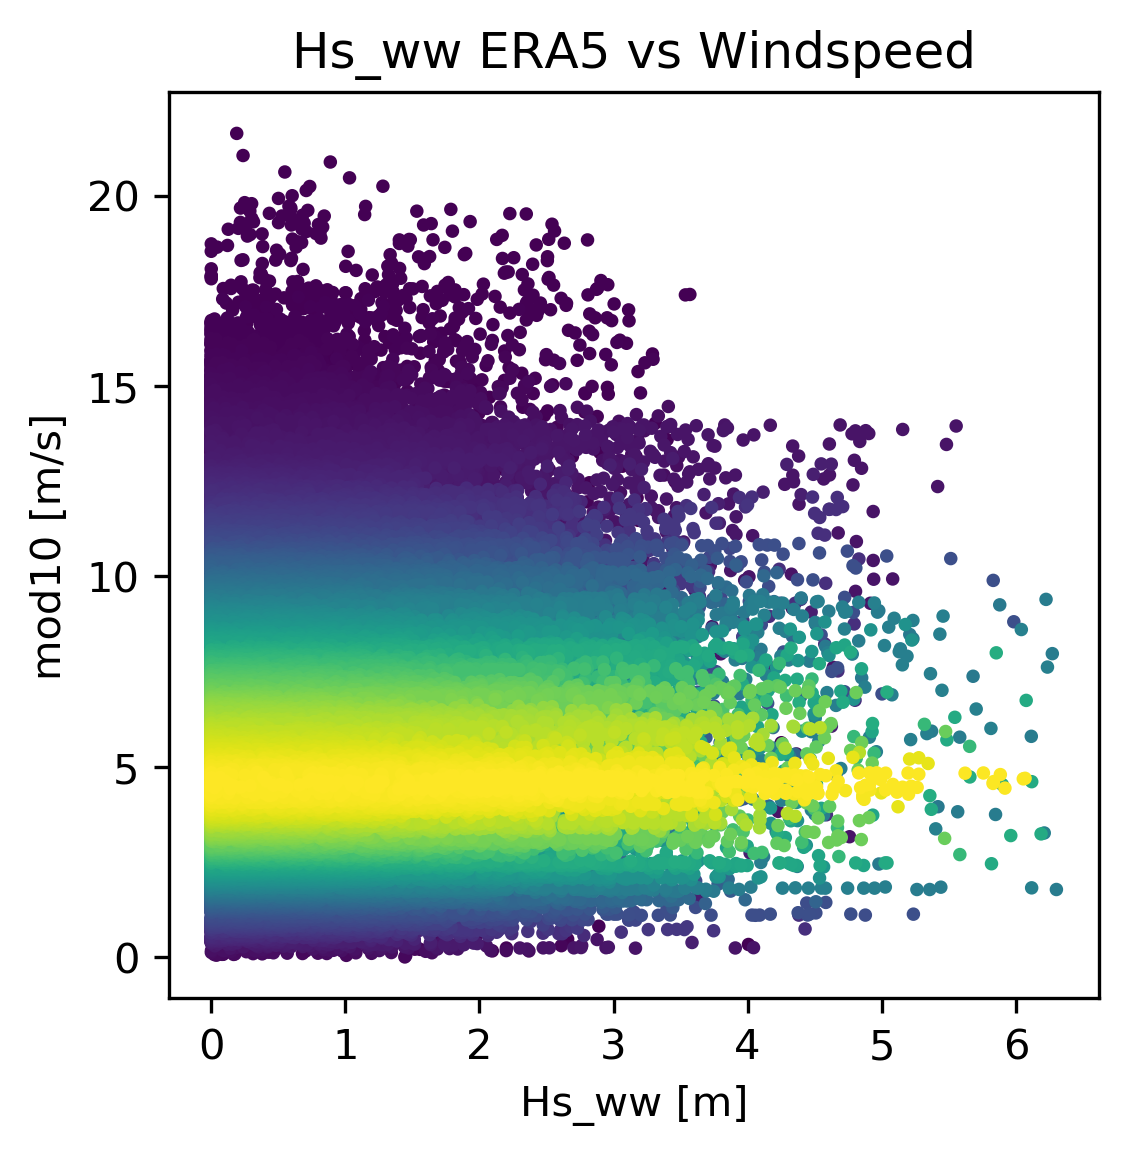

In [60]:
plt.figure(figsize=[4,4])
plt.title('Hs_ww ERA5 vs Windspeed')
plt.scatter(Hs_ww_CSV[2],mod10, c=z,s=5)
plt.xlabel('Hs_ww [m]')
plt.ylabel('mod10 [m/s]')
# plt.xscale('symlog')
# plt.yscale('symlog')
plt.savefig('Images/Scatter_Hs_wwERA5_mod10.png')
# plt.close()

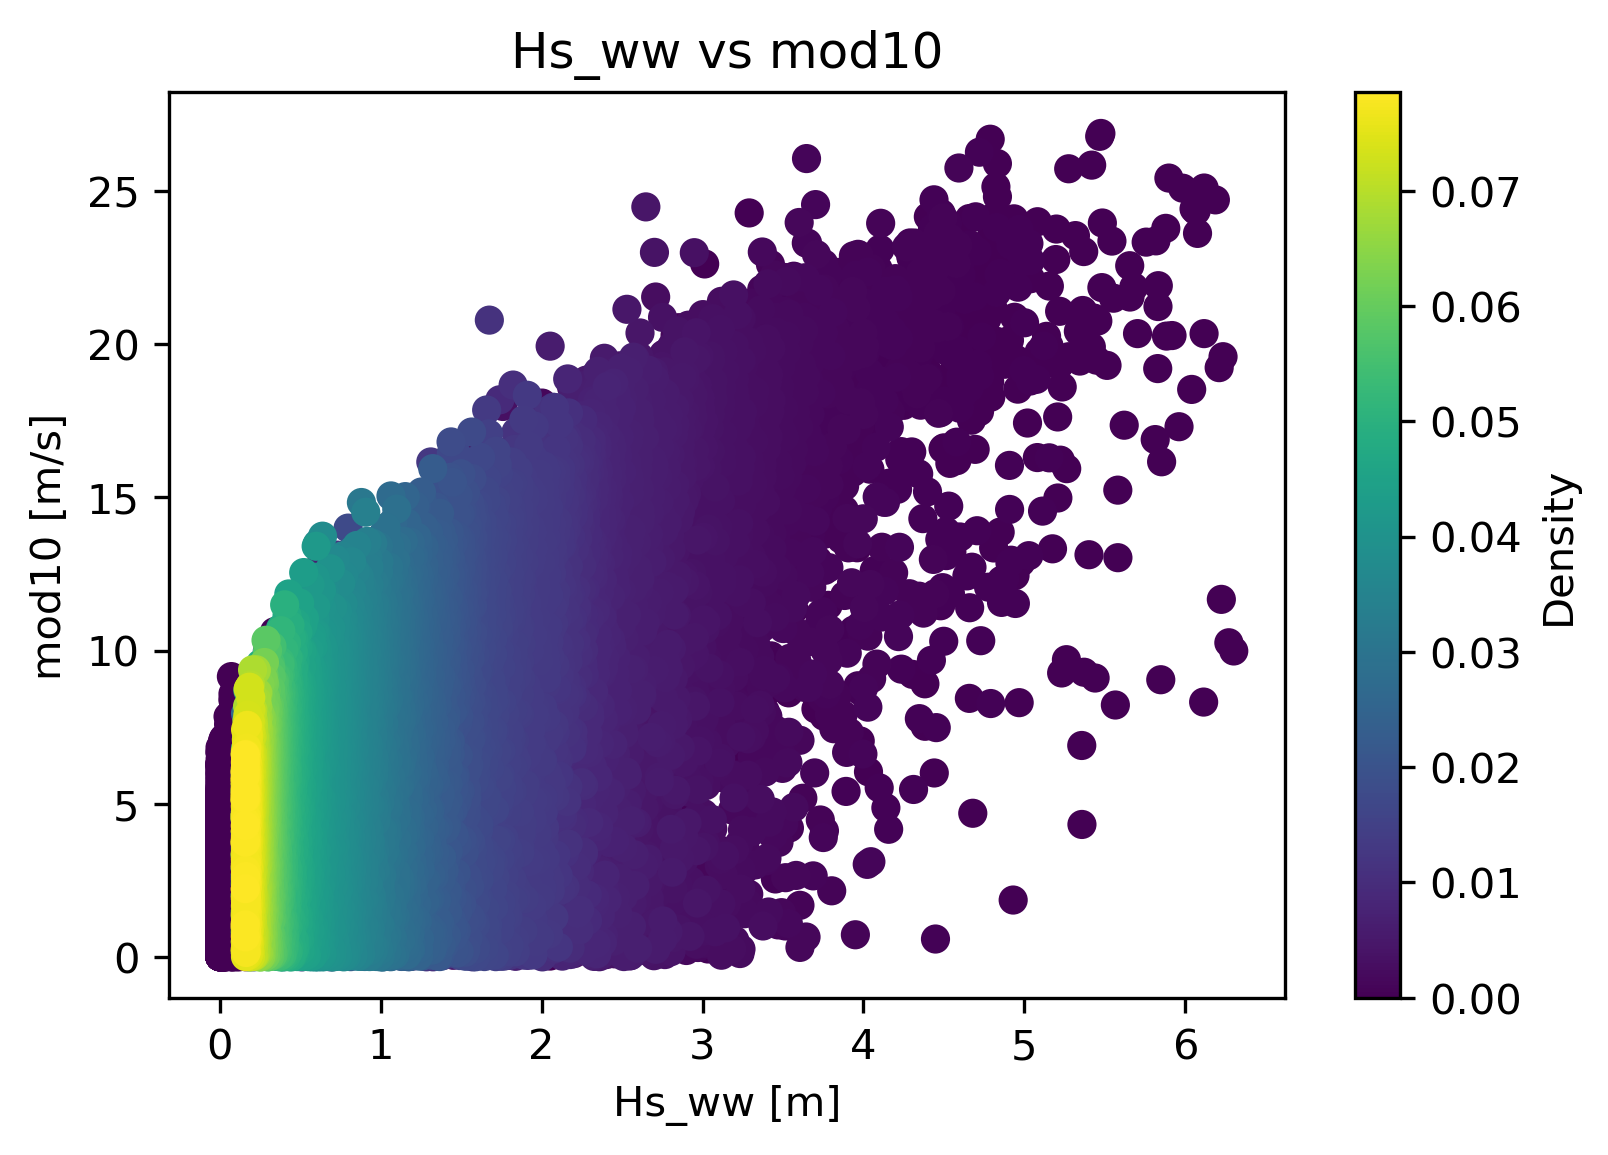

In [721]:
density_scatter(Hs_ww_CSV[2], mod10,'Hs_ww vs mod10','Hs_ww [m]','mod10 [m/s]',bins = [20,20])

### Hist

In [548]:
plt.figure(figsize=[10,3])
plt.title('Dependence of Hs ERA5 on P')
plt.hist(np.asarray(Hs_ww_CSV_cut1[2])[P_CSV_cut1[2]>0],20, density=True,alpha=0.5,label='P>= 0 mm/h')
plt.hist(np.asarray(Hs_ww_CSV_cut1[2])[P_CSV_cut1[2]>.5],20, density=True,alpha=0.5,label='P>= 0.5 mm/h')
plt.hist(np.asarray(Hs_ww_CSV_cut1[2])[P_CSV_cut1[2]>2],20, density=True,alpha=0.5,label='P>= 2 mm/h')
plt.legend()
plt.xlabel('Hs [m]')
plt.ylabel('Probability/cell width')
plt.savefig('Images/Hist_P_HsWwERA5.png')
plt.close()

## Less usefull dependecy plots

In [579]:
plt.figure(figsize=[10,3])
plt.title('Dependence of P on Hs ERA5')
plt.hist(np.asarray(P_CSV_cut1[2])[Hs_ww_CSV_cut1[2]>0],40, density=True,alpha=0.5,label='P>= 0 mm/h')
plt.hist(np.asarray(P_CSV_cut1[2])[Hs_ww_CSV_cut1[2]>.5],40, density=True,alpha=0.5,label='P>= 0.5 mm/h')
plt.hist(np.asarray(P_CSV_cut1[2])[Hs_ww_CSV_cut1[2]>2],40, density=True,alpha=0.5,label='P>= 2 mm/h')
plt.legend()
plt.xlabel('Precipitation [m]')
plt.ylabel('Probability/cell width')
plt.close()

# Less clear dependence

In [133]:
# library & dataset
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset('iris')
 
# with regression
sns.pairplot(df, kind="reg")
plt.show()
 
# without regression
sns.pairplot(df, kind="scatter")
plot.show()